# Intermediate Project - SAAS Career Exploration - Part 2

For this project, you will be using the tools that you have learned so far on a real data science problem. You will be cleaning and analyzing a dataset to answer a research question, something that you will be doing for your entire career if you continue down this path.

This project will be done **in groups**. If you can, please stay with the same groups as for part 1! If you are having trouble finding a partner, please contact your committee director or post on the Career-Exploration Slack channel.

The final product for this project will be a statistical model that answers a question posed about the data, in addition to a short description about how your model works and its limitations.

In [1]:
# Setup code
import seaborn as sns #; sns.set()
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

general = pd.read_csv("2016-us-election/county_facts.csv")
column_dict_df = pd.read_csv("2016-us-election/county_facts_dictionary.csv")
primaries = pd.read_csv("2016-us-election/primary_results.csv")

Here is the necessary data cleaning. I join the voting data from `primaries` with the demographic data from `general` to create one big dataframe named `df`; please use this dataframe to make your plots. Note that this dataframe is missing some counties because there was no demographic data about those counties in `general`.

In [2]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
# Credit to https://gist.github.com/rogerallen/1583593

In [3]:
# Turn the county_facts_dictionary.csv file into a dictionary
column_dict = column_dict_df.set_index("column_name").to_dict()['description']

# Use that dictionary to rename the columns of general
general.columns = general.columns.to_series().map(lambda x: column_dict.get(x,x))

# Extract the rows corresponding to states from general (note that these are the rows with NaN in the 
# state_abbreviation column, minus the first row which is the whole US)
states = general[general['state_abbreviation'].isnull()][1:].reset_index(drop=True)

# Attach the state abbreviations to the states dataframe
states["state_abbreviation"] = general["state_abbreviation"].unique()[1:]

# Extract the rows corresponding to counties from general
counties = general[~general['state_abbreviation'].isnull()].reset_index(drop=True)

# Create the pivot table from last time
pivot_table = pd.pivot_table(primaries,index=["state","county"],columns="candidate",values="fraction_votes")
pivot_table.reset_index(inplace = True)

# Join the two dataframes together
pivot_table["state_abbreviation"] = pivot_table["state"].map(us_state_abbrev)
pivot_table["state_county"] = pivot_table["state_abbreviation"] + " " + pivot_table['county'] + ' County'
counties["state_county"] = counties["state_abbreviation"] + " " + counties["area_name"]

df = pd.merge(pivot_table,counties,on="state_county")
df.head()

,state,county,No Preference,Uncommitted,Ben Carson,Bernie Sanders,Carly Fiorina,Chris Christie,Donald Trump,Hillary Clinton,...,"Hispanic-owned firms, percent, 2007","Women-owned firms, percent, 2007","Manufacturers shipments, 2007 ($1,000)","Merchant wholesaler sales, 2007 ($1,000)","Retail sales, 2007 ($1,000)","Retail sales per capita, 2007","Accommodation and food services sales, 2007 ($1,000)","Building permits, 2014","Land area in square miles, 2010","Population per square mile, 2010"
0,Alabama,Autauga,NaN,NaN,0.146,0.182,NaN,NaN,0.445,0.800,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1,Alabama,Baldwin,NaN,NaN,0.084,0.329,NaN,NaN,0.469,0.647,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
2,Alabama,Barbour,NaN,NaN,0.122,0.078,NaN,NaN,0.501,0.906,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
3,Alabama,Bibb,NaN,NaN,0.099,0.197,NaN,NaN,0.494,0.755,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
4,Alabama,Blount,NaN,NaN,0.100,0.386,NaN,NaN,0.487,0.551,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9


## 1. Plotting

In this checkpoint, let's practice making some plots! For all of these parts, try to make your graphs presentation-ready; add a title, axis labels, and a legend if necessary. Someone else should be able to look at your graph and understand what it's saying without you explaining what's going on! **Also, throughout this project, make sure you make at least one plot using matplotlib and at least one plot using seaborn.**

### 1.1. Scatterplots

In the 2016 primaries, each party had a candidate who was a strong challenger to the establishment of the party - these two people were Donald Trump and Bernie Sanders. Given this dataset, one question we could ask is: were counties that voted for Sanders more or less likely to vote for Trump? <span style="color:blue"> Make a scatterplot where the two axes are the proportion of people who voted for Sanders and Trump. Throughout this question and the rest of the notebook, please use the `df` dataframe. </span>

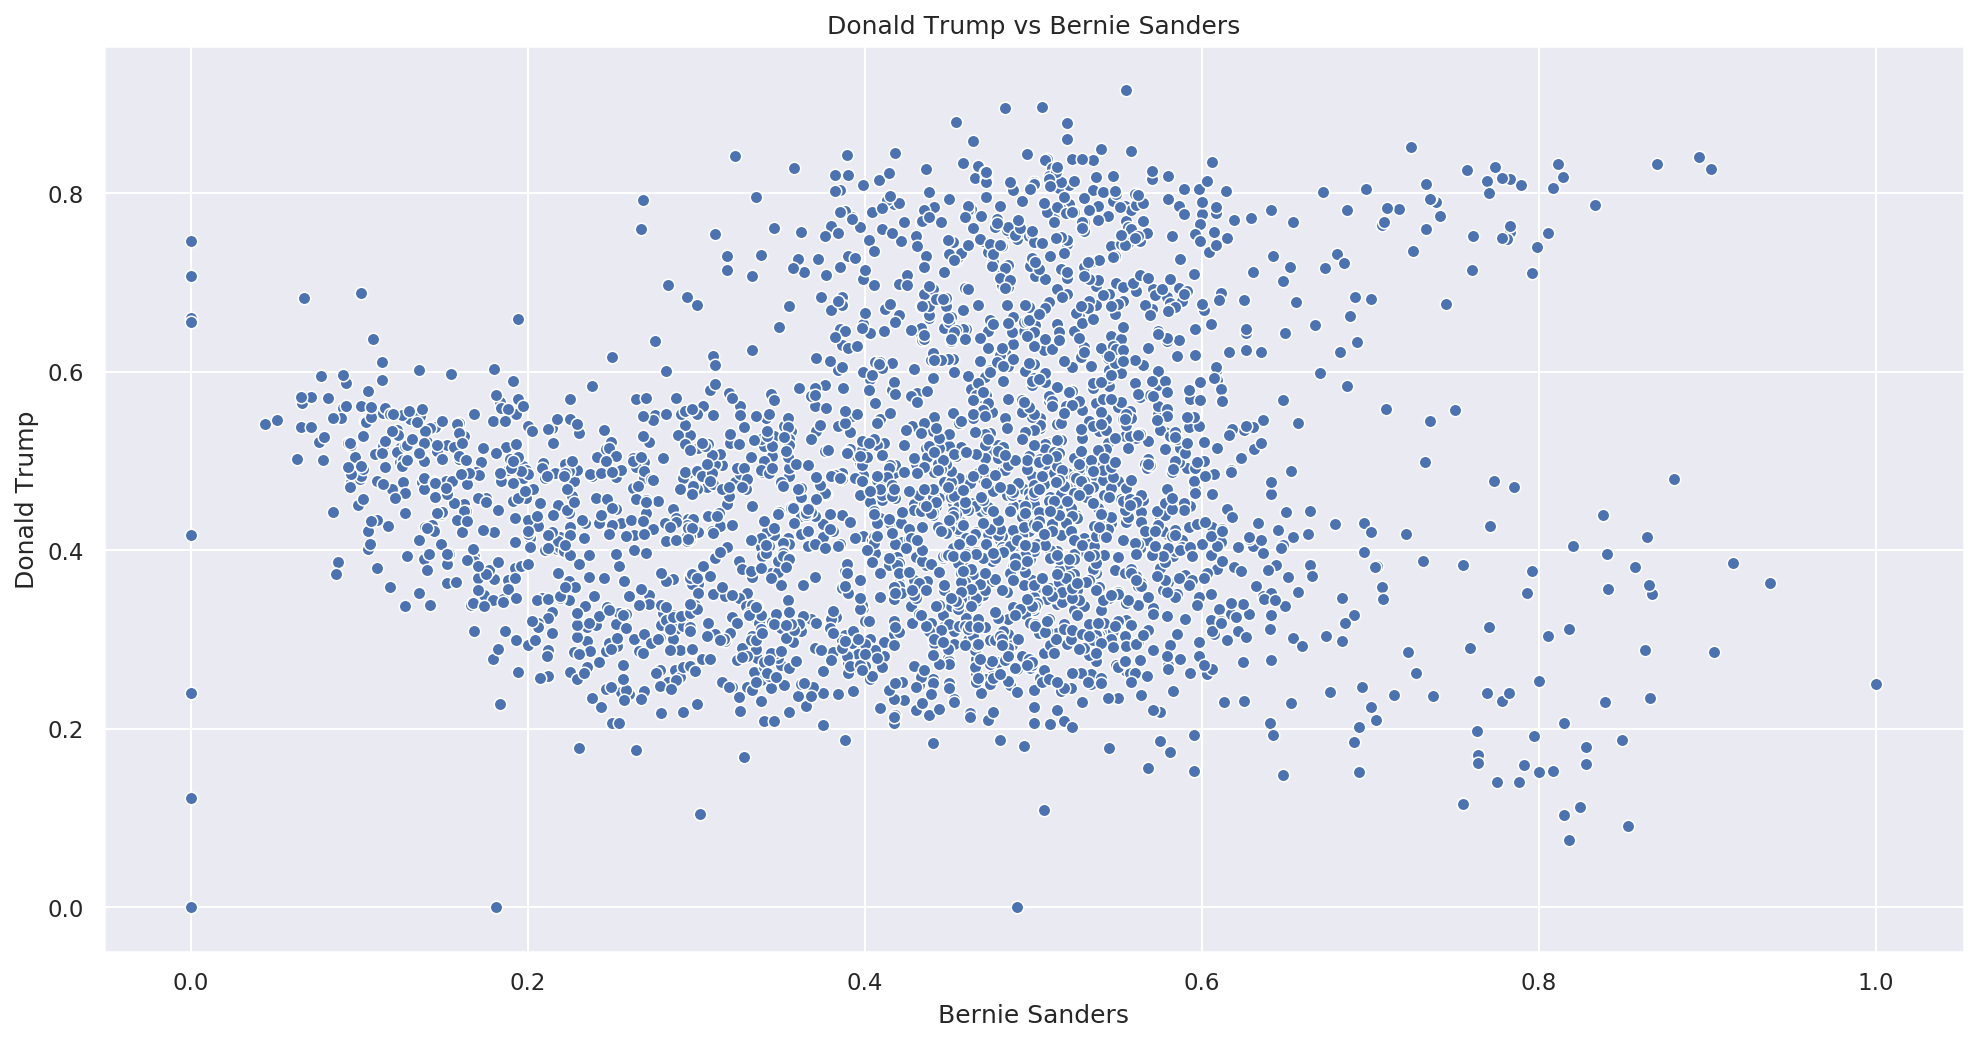

In [4]:
# YOUR CODE HERE
plt.title('Donald Trump vs Bernie Sanders')
sns.scatterplot(data = df, x = 'Bernie Sanders', y = 'Donald Trump')

Interesting! This scatterplot is not a straightforward line going up or down - instead, it has a more complicated shape. What makes the graph look like this? To help us answer this question, let's add some color to our plot. <span style="color:blue"> Color the plot based on the `'White alone, percent, 2014'` column from `df`, and write a short explanation of what you observe. </span> (White alone, not Hispanic or Latino are individuals who responded "No, not Spanish/Hispanic/Latino" and who reported "White" as their only entry in the race question.)

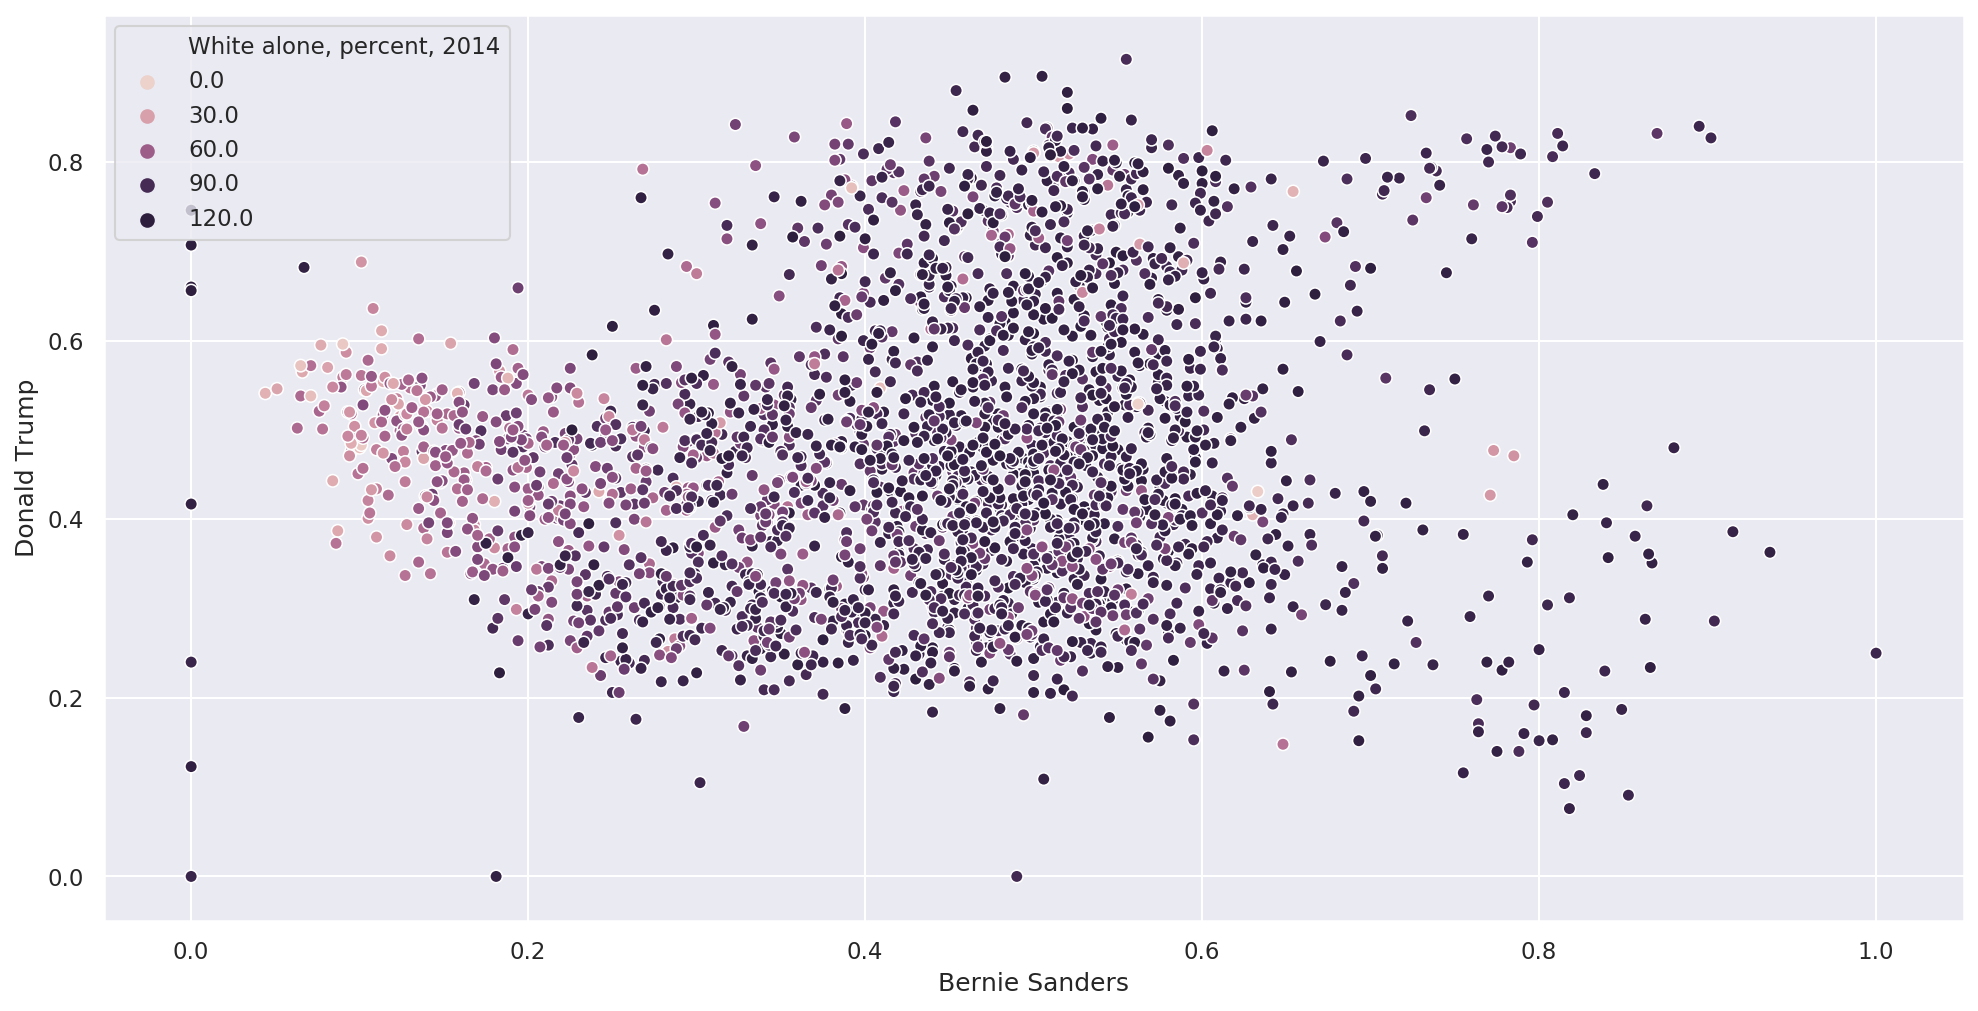

In [6]:
# YOUR CODE HERE
sns.scatterplot(data = df, x = 'Bernie Sanders', y = 'Donald Trump', hue = 'White alone, percent, 2014' )

YOUR EXPLANATION HERE

### 1.2. Challenge Problem (Optional)
<span style="color:blue"> First, make a copy of the above plot, but use the column `'Asian-owned firms, percent, 2007 62'` for the coloring instead of the white alone column. </span>

In [7]:
# YOUR CODE HERE
df.columns

Index(['state', 'county', ' No Preference', ' Uncommitted', 'Ben Carson',
       'Bernie Sanders', 'Carly Fiorina', 'Chris Christie', 'Donald Trump',
       'Hillary Clinton', 'Jeb Bush', 'John Kasich', 'Marco Rubio',
       'Martin O'Malley', 'Mike Huckabee', 'Rand Paul', 'Rick Santorum',
       'Ted Cruz', 'state_abbreviation_x', 'state_county', 'fips', 'area_name',
       'state_abbreviation_y', 'Population, 2014 estimate',
       'Population, 2010 (April 1) estimates base',
       'Population, percent change - April 1, 2010 to July 1, 2014',
       'Population, 2010', 'Persons under 5 years, percent, 2014',
       'Persons under 18 years, percent, 2014',
       'Persons 65 years and over, percent, 2014',
       'Female persons, percent, 2014', 'White alone, percent, 2014',
       'Black or African American alone, percent, 2014',
       'American Indian and Alaska Native alone, percent, 2014',
       'Asian alone, percent, 2014',
       'Native Hawaiian and Other Pacific Islander al

We see that because there are a few outliers, the whole colormap becomes essentially the same color. <span style="color:blue">Find a way to fix this without just removing the outliers!</span> (This is pretty open-ended, there are a couple of different approaches you could take.)

In [ ]:
# YOUR CODE HERE

### 1.3. Histograms

<span style="color:blue">First, pick one of the demographic variables (i.e. not the vote percentages) and make a histogram of that variable.

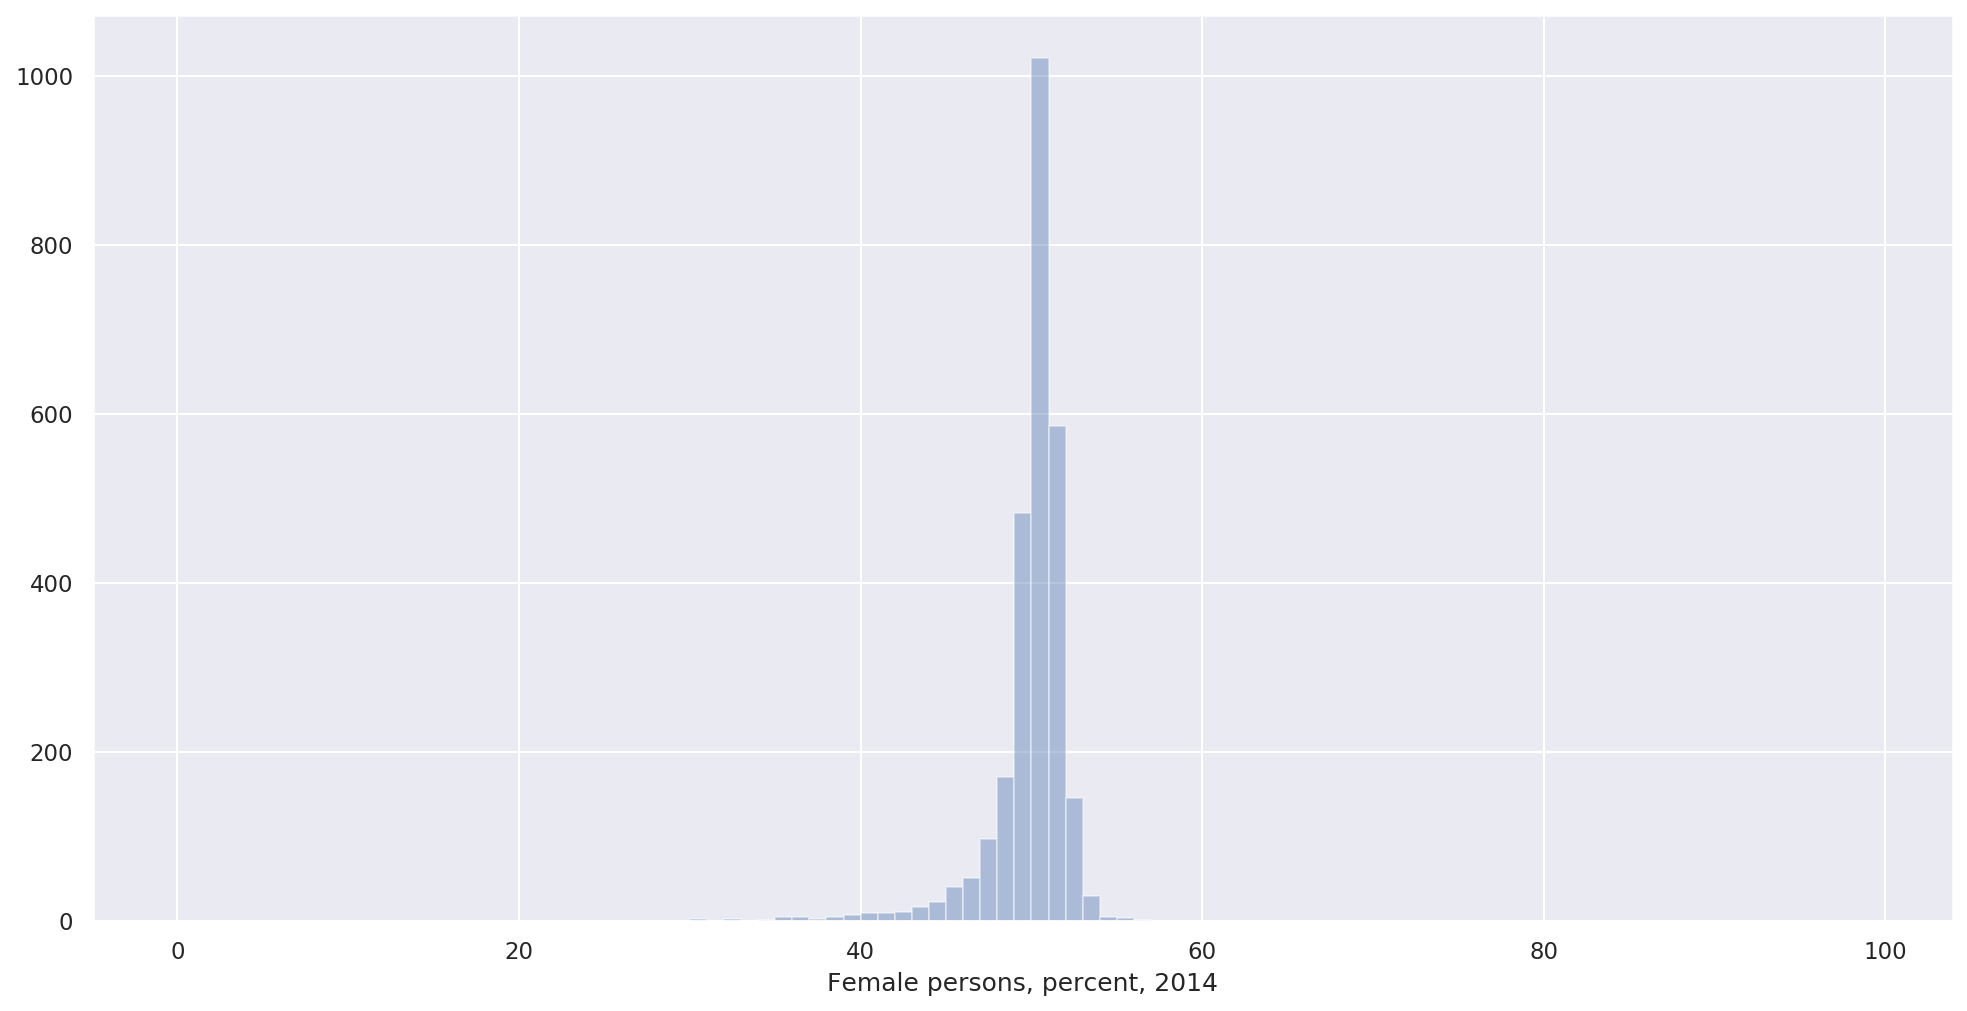

In [8]:
# YOUR CODE HERE
bins = np.arange(0,100,1)
sns.distplot(df['Female persons, percent, 2014'], bins=bins, kde=False)

From the above histogram, you can see the distribution of the variable across the whole dataset. However, maybe we want to see how the distribution varies over different parts of the dataset. <span style="color:blue">Break your dataset into (at least) two subsets based on one of the vote percentage columns (e.g. whether or not Hillary got >50% of the vote) and create histograms for each of those parts.

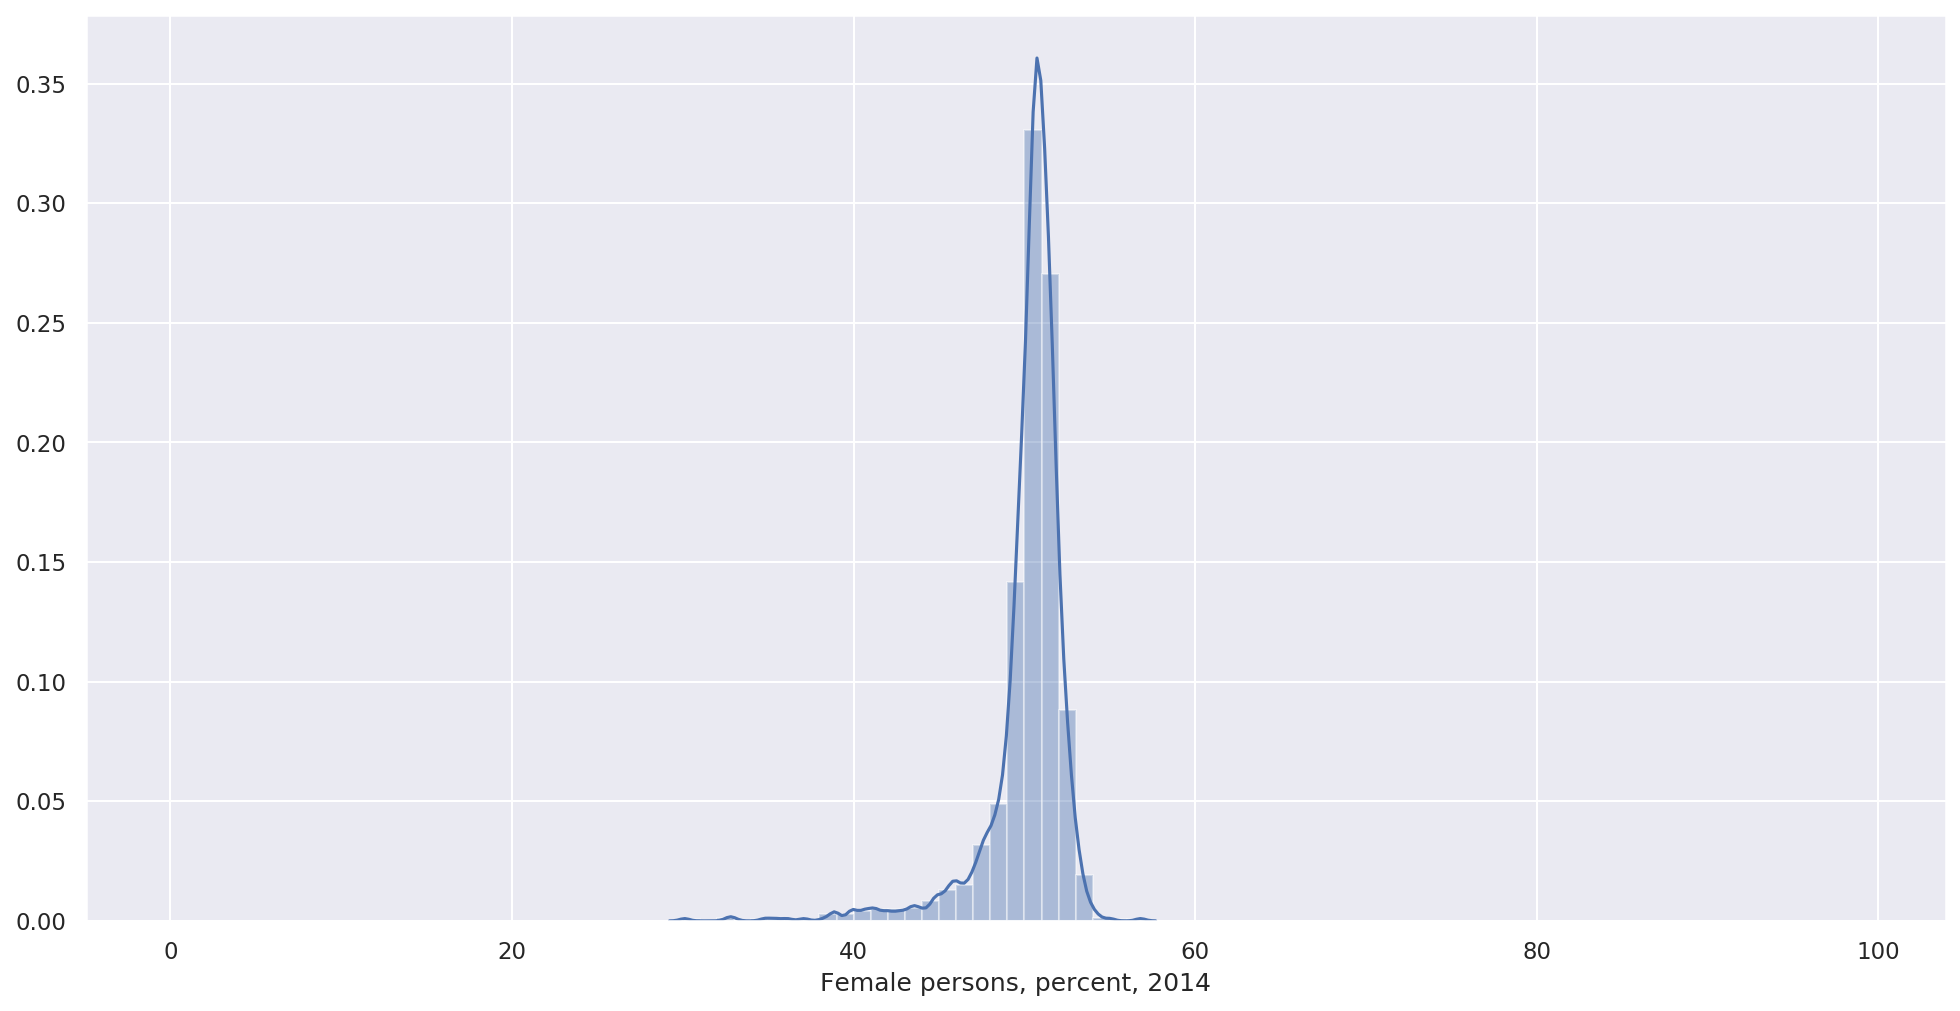

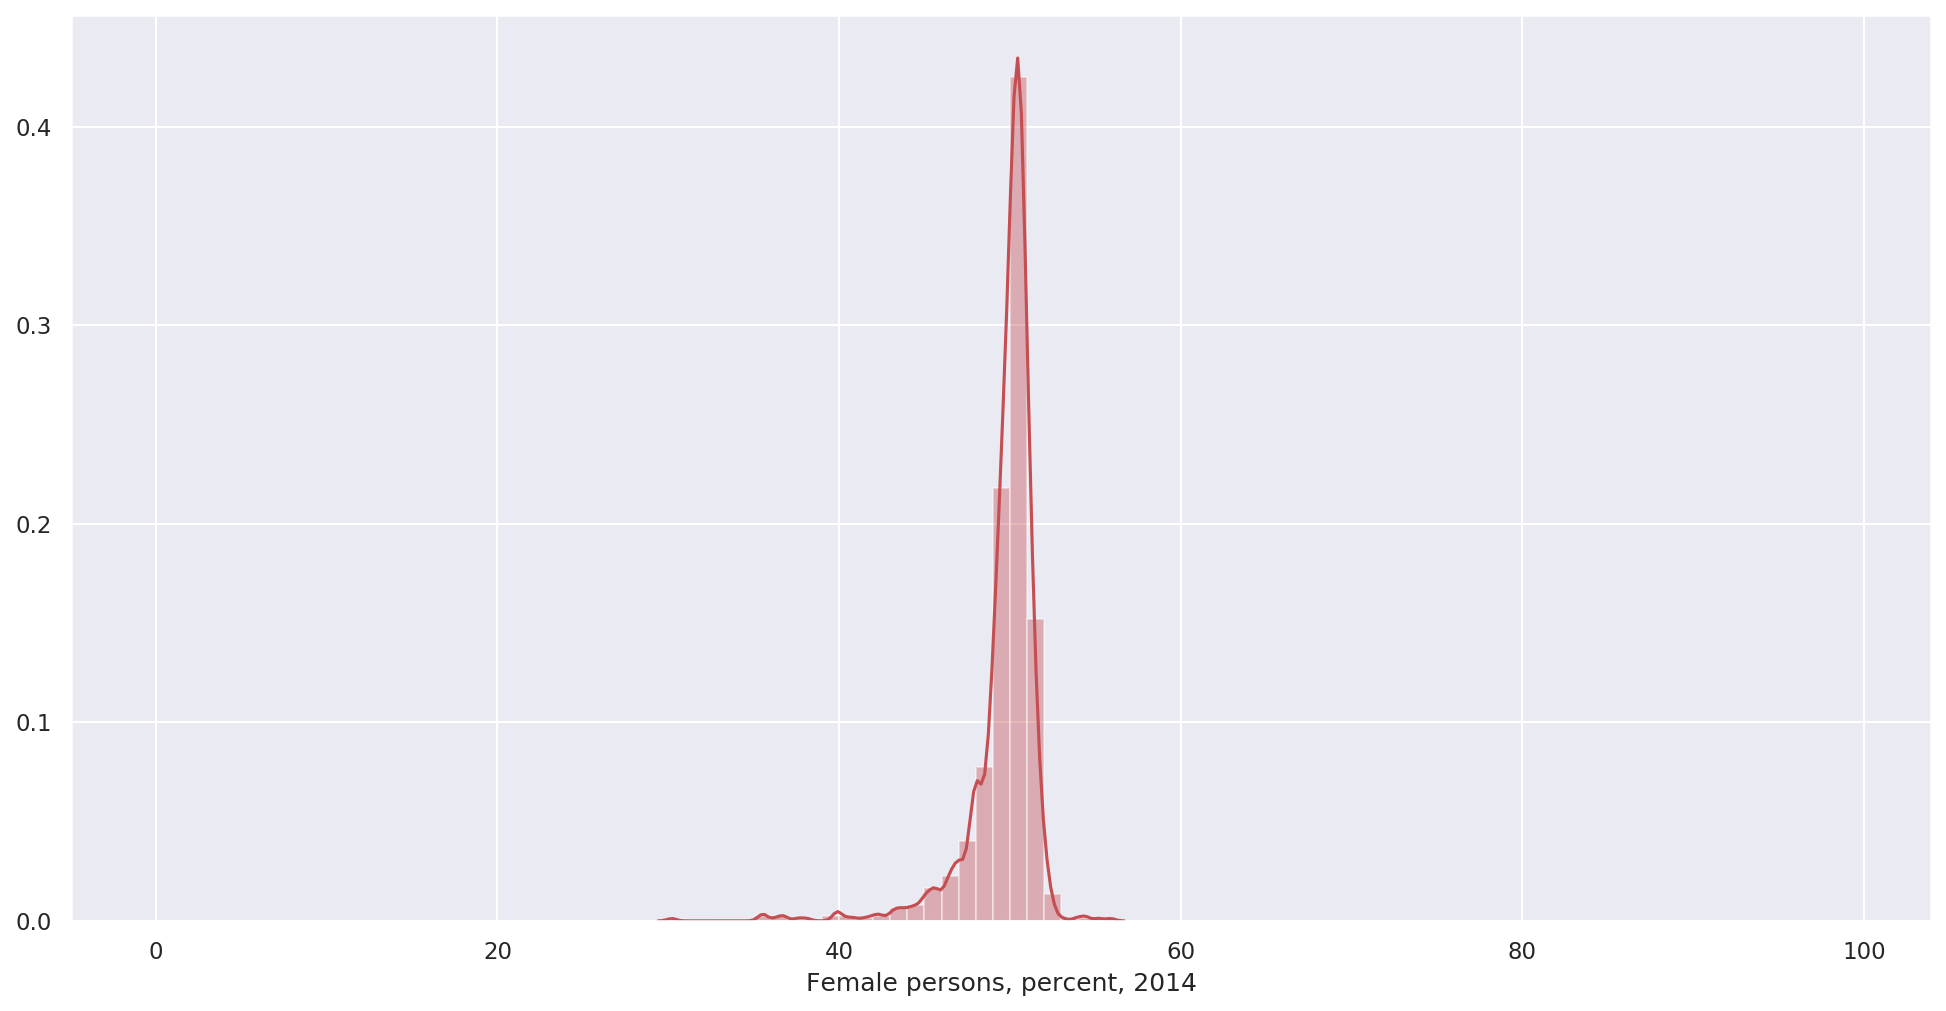

In [14]:
# YOUR CODE HERE
data1 = df[df['Hillary Clinton'] >= .5]['Female persons, percent, 2014']
data2 = df[df['Hillary Clinton'] <  .5]['Female persons, percent, 2014']
sns.distplot(data1, bins=bins, kde=True, color = 'b')
plt.figure()
sns.distplot(data2, bins=bins, kde=True, color = 'r')

How are your histograms for each subset different? <span style="color:blue">Write a short summary in words about what you see in your histograms.

YOUR RESPONSE HERE Counties with more females tend to be counties where Hillary Clinton won most of the votes

### 1.4. Your turn!

<span style="color:blue">Make one more graph of your own choosing out of any of the other kinds of graphs from the lecture. </span>Remember to add a title, axis labels, and a legend if necessary to make your plot readable!

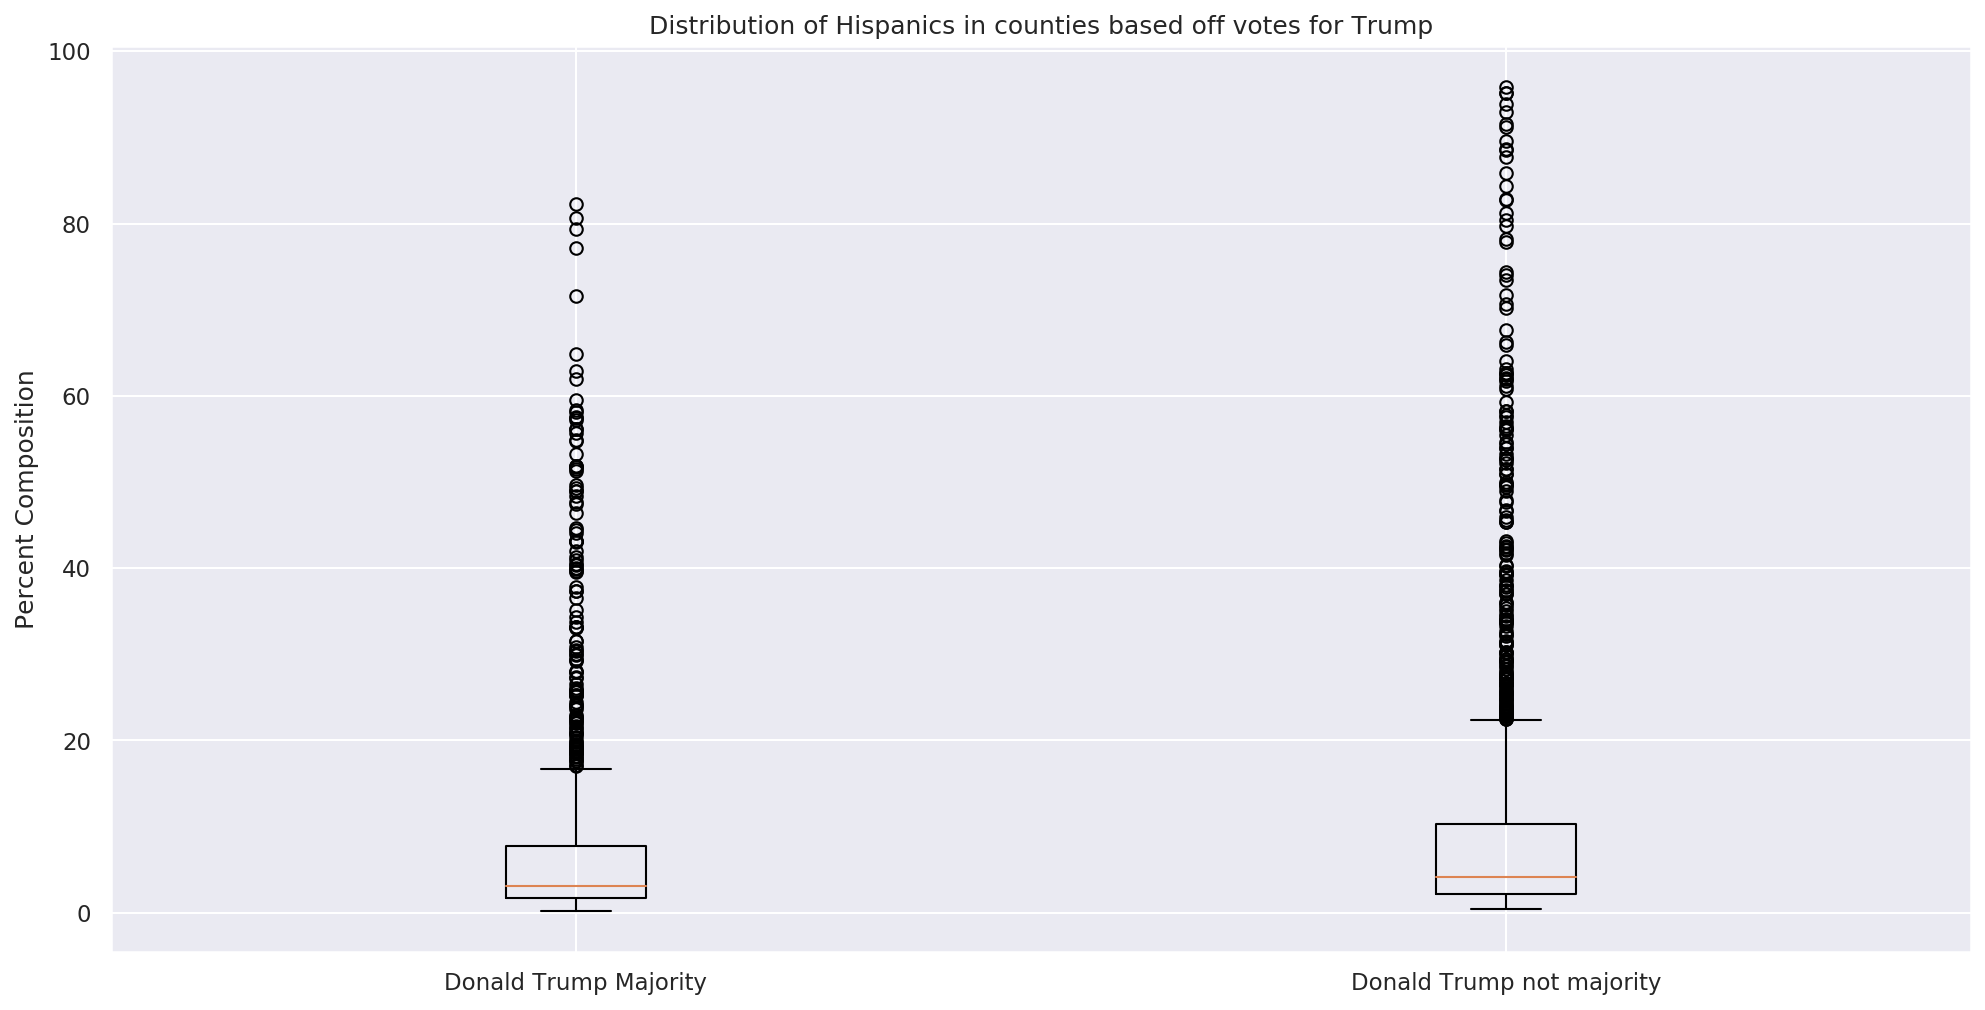

In [18]:
# YOUR CODE HERE
plt.title('Distribution of Hispanics in counties based off votes for Trump')
plt.ylabel('Percent Composition')
plt.boxplot([df[df['Donald Trump'] > 0.5]['Hispanic or Latino, percent, 2014'], 
            df[df['Donald Trump'] <= 0.5]['Hispanic or Latino, percent, 2014']], labels=['Donald Trump Majority'
                                                                                      , 'Donald Trump not majority']);

For this part as well, add your own interpretation about what you see in your graph.

YOUR RESPONSE HERE
Donald Trump tends to win counties with a smaller Hispanic populations.

## 2. Submission

**To submit, first save this file as a pdf by going to the top left and clicking File -> Download as -> PDF via LaTex (.pdf), then fill out this form!**

https://docs.google.com/forms/d/e/1FAIpQLSdWVvpyAKW8yzo4VARry_XrC4Jpbh-wrKzT0mOezufj731OmA/viewform